In [1]:
%matplotlib notebook

C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import paramonte as pm
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()

In [3]:
df = pd.read_csv("http://www.cdslab.org/recipes/programming/regression-censored-gaussian-data/data.csv", header=None)

In [4]:
df.head()

0
0  0.20435
1  0.96737
2  0.62652
3  0.59974
4  0.83498

<IPython.core.display.Javascript object>


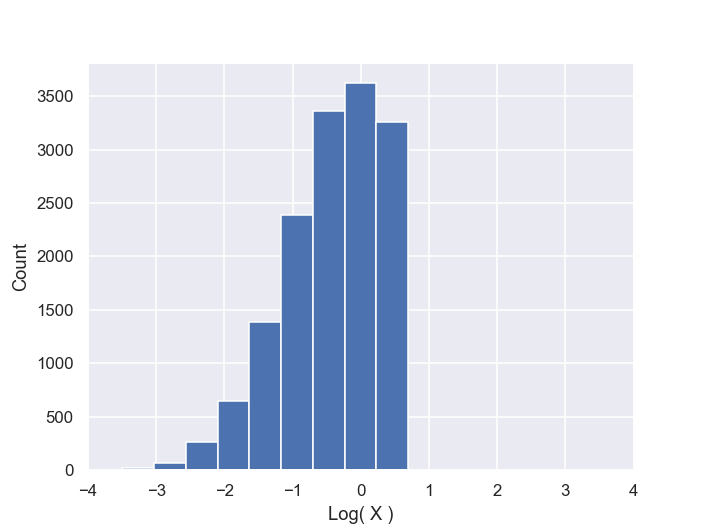

In [5]:
# log-transform data so that it can be fit by a Normal distribution

logx = np.double(np.log(df.iloc[:,0]))

# plot histogram of log(data)

fig = plt.figure()
ax = fig.gca()
ax.hist(logx)
ax.set_xlim([-4,4])
ax.set_xlabel("Log( X )")
ax.set_ylabel("Count")
plt.show()

In [8]:
def getLogPDF(x,mean,logStd):
    std = np.exp(logStd)
    return -np.log(np.sqrt(2*np.pi)) - logStd - (x - mean)**2 / (2*std**2)

In [9]:
np.exp(getLogPDF(x = 0, mean = 0, logStd = np.log(1)))

0.3989422804014327

In [10]:
def getLogLike(params): return np.sum(getLogPDF(x = logx[0:10000], mean = params[0], logStd = params[1]))

In [11]:
getLogLike(params = [0, 0])

-12746.950927850145

In [11]:
import paramonte as pm
pm.version.interface.dump() # get the version of ParaMonte we are working with
pmpd = pm.ParaDRAM() # create a ParaDRAM sampler object
pmpd.spec.chainSize = 20000 # change the number of sampled points from default 100,000 to 30,000
pmpd.spec.variableNameList = ["Average","LogStandardDeviation"]
pmpd.spec.startPointVec = [0,0] # ensure the initial starting point of the search for cutoff is good.
pmpd.spec.targetAcceptanceRate = [0.1,0.3] # ensure the MCMC sampling efficiency does not become too large or too small.

# call MCMC sampler

pmpd.runSampler( ndim = 2
               , getLogFunc = getLogLike
               )


ParaDRAM - NOTE: Running the ParaDRAM sampler in serial mode...
ParaDRAM - NOTE: To run the ParaDRAM sampler in parallel mode visit:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     https://www.cdslab.org/paramonte
ParaDRAM - NOTE: 
ParaDRAM - NOTE: If you are using Jupyter notebook, check the Jupyter's 
ParaDRAM - NOTE: terminal window for realtime simulation progress and report.


ParaDRAM - NOTE: To read the generated output files, try:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     pmpd.readReport()      # to read the summary report from the output report file.
ParaDRAM - NOTE:     pmpd.readSample()      # to read the final i.i.d. sample from the output sample file.
ParaDRAM - NOTE:     pmpd.readChain()       # to read the uniquely-accepted points from the output chain file.
ParaDRAM - NOTE:     pmpd.readMarkovChain() # to read the Markov Chain. NOT recommended for very large chains.
ParaDRAM - NOTE:     pmpd.readRestart()     # to read the contents of an ASCII-format output restart file.
ParaDRAM 

In [12]:
pmpd.readSample()


ParaDRAM - WARNING: The ``delimiter`` is neither given as input to ``readSample()``
ParaDRAM - WARNING: nor set as a simulation specification of the ParaDRAM object. 
ParaDRAM - WARNING: This information is essential, otherwise how could the output files be parsed?
ParaDRAM - WARNING: For now, the ParaDRAM sampler will assume a comma-separated 
ParaDRAM - WARNING: file format for the contents of the sample file(s) to be parsed.


ParaDRAM - NOTE: 1 files detected matching the pattern: "D:\Dropbox\Projects\20190704_recipes\recipes.raw\programming\regression-censored-gaussian-data\ParaDRAM_run_20211112_213048_706*_sample.txt"


ParaDRAM - NOTE: processing sample file: D:\Dropbox\Projects\20190704_recipes\recipes.raw\programming\regression-censored-gaussian-data\ParaDRAM_run_20211112_213048_706_process_1_sample.txt
ParaDRAM - NOTE: reading the file contents... done in 0.011987 seconds.
ParaDRAM - NOTE: ndim = 2, count = 7998
ParaDRAM - NOTE: parsing file contents... 
ParaDRAM - NOTE: com


ParaDRAM - WARNING: The ``delimiter`` is neither given as input to ``readSample()``
ParaDRAM - WARNING: nor set as a simulation specification of the ParaDRAM object. 
ParaDRAM - WARNING: This information is essential, otherwise how could the output files be parsed?
ParaDRAM - WARNING: For now, the ParaDRAM sampler will assume a comma-separated 
ParaDRAM - WARNING: file format for the contents of the sample file(s) to be parsed.


ParaDRAM - NOTE: 1 files detected matching the pattern: "D:\Dropbox\Projects\20190704_recipes\recipes.raw\programming\regression-censored-gaussian-data\ParaDRAM_run_20211112_213048_706*_sample.txt"


ParaDRAM - NOTE: processing sample file: D:\Dropbox\Projects\20190704_recipes\recipes.raw\programming\regression-censored-gaussian-data\ParaDRAM_run_20211112_213048_706_process_1_sample.txt
ParaDRAM - NOTE: reading the file contents... done in 0.014998 seconds.
ParaDRAM - NOTE: ndim = 2, count = 7998
ParaDRAM - NOTE: parsing file contents... 
ParaDRAM - NOTE: com

<IPython.core.display.Javascript object>


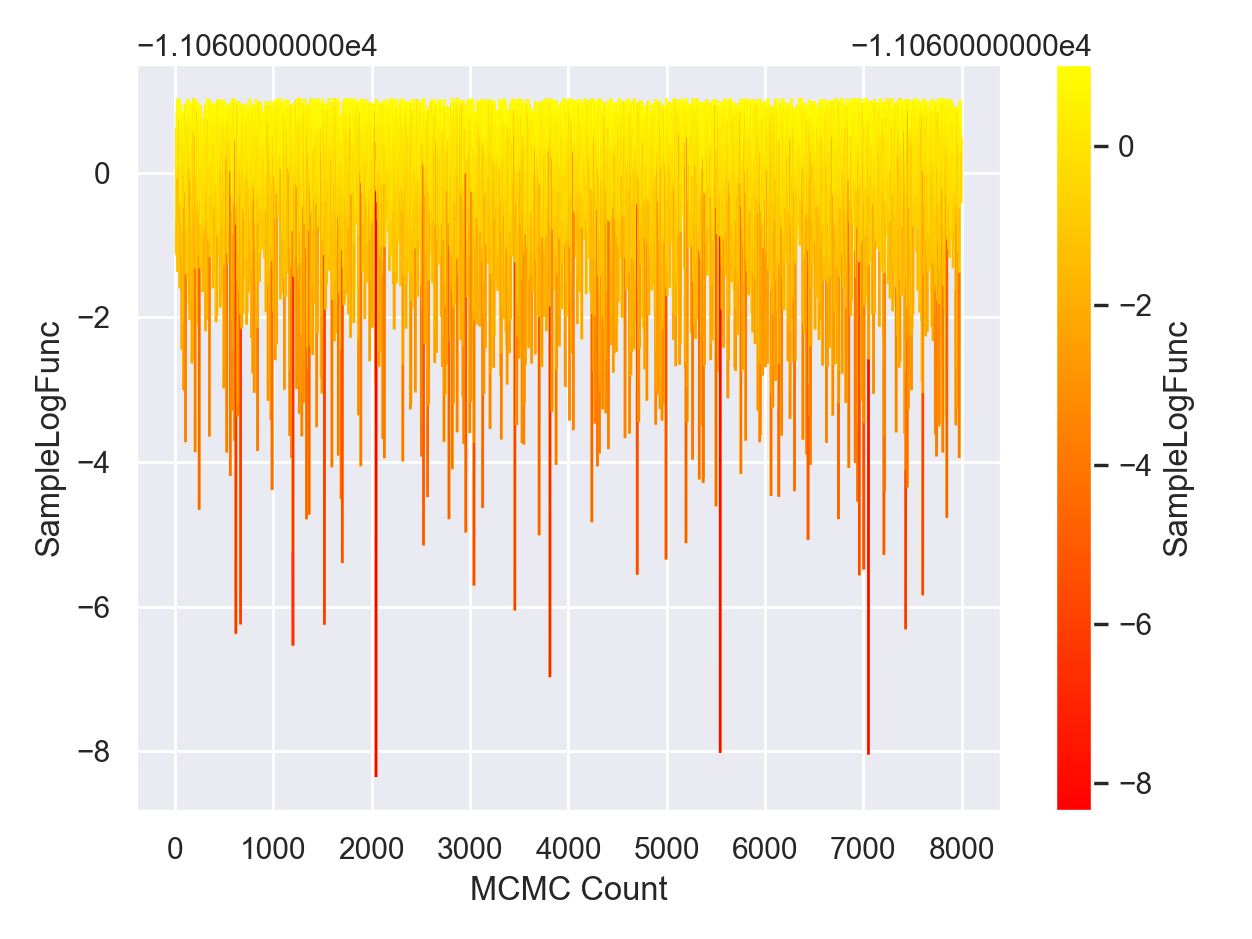

done in 0.170967 seconds.
ParaDRAM - NOTE: making the line plot... 

C:\Users\shahmoradia\Anaconda3\lib\site-packages\paramonte\vis\_BasePlot.py:638: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  self.currentFig.axes = self.currentFig.figure.gca( **vars(self.axes.kws) )


<IPython.core.display.Javascript object>


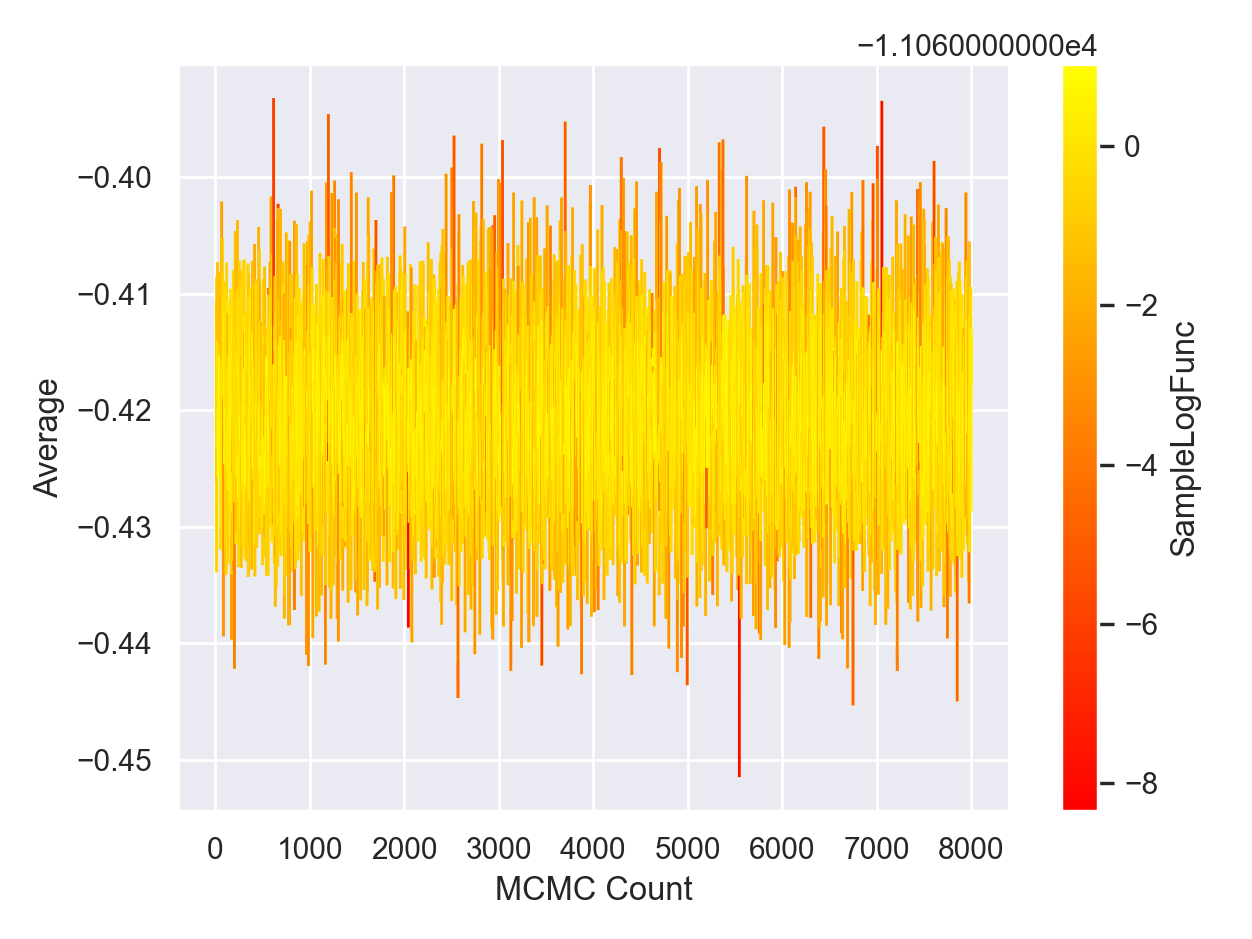

C:\Users\shahmoradia\Anaconda3\lib\site-packages\paramonte\vis\_BasePlot.py:638: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  self.currentFig.axes = self.currentFig.figure.gca( **vars(self.axes.kws) )


done in 0.238042 seconds.
ParaDRAM - NOTE: making the line plot... 

<IPython.core.display.Javascript object>


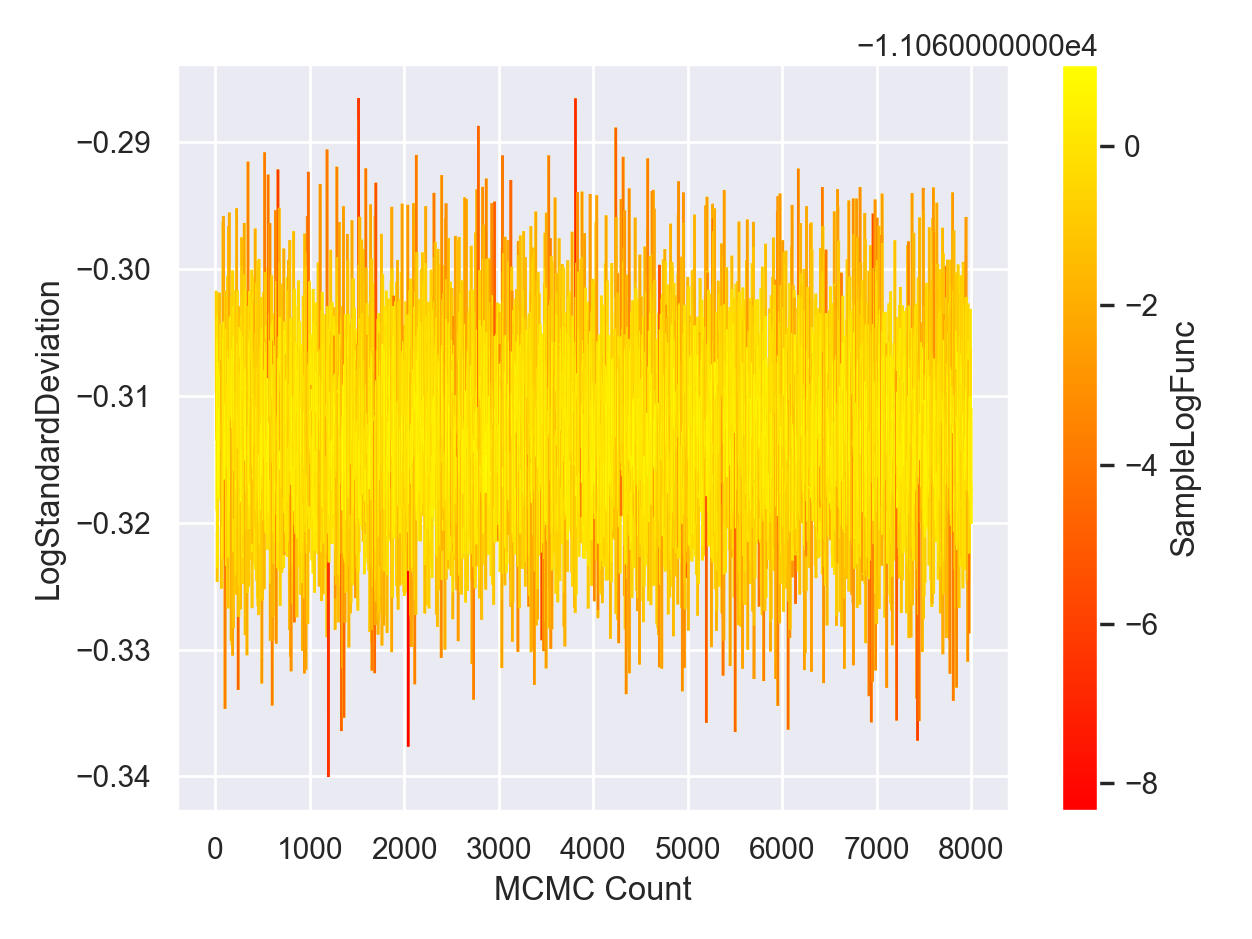

done in 0.162955 seconds.
SampleLogFunc
ParaDRAM - NOTE: making the histplot plot... 

C:\Users\shahmoradia\Anaconda3\lib\site-packages\paramonte\vis\_BasePlot.py:638: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  self.currentFig.axes = self.currentFig.figure.gca( **vars(self.axes.kws) )


<IPython.core.display.Javascript object>


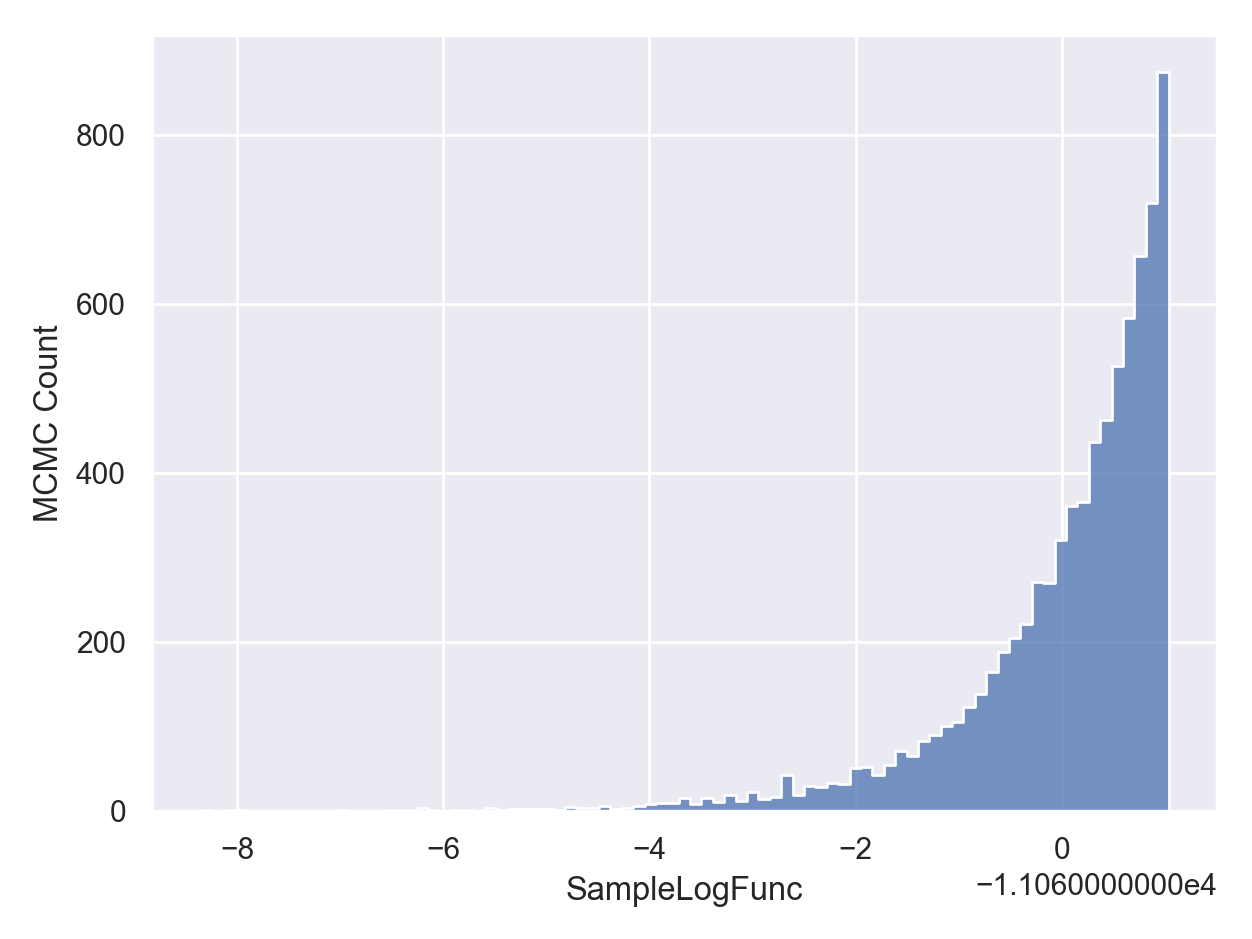

C:\Users\shahmoradia\Anaconda3\lib\site-packages\paramonte\vis\_BasePlot.py:638: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  self.currentFig.axes = self.currentFig.figure.gca( **vars(self.axes.kws) )


done in 0.095003 seconds.
Average
ParaDRAM - NOTE: making the histplot plot... 

<IPython.core.display.Javascript object>


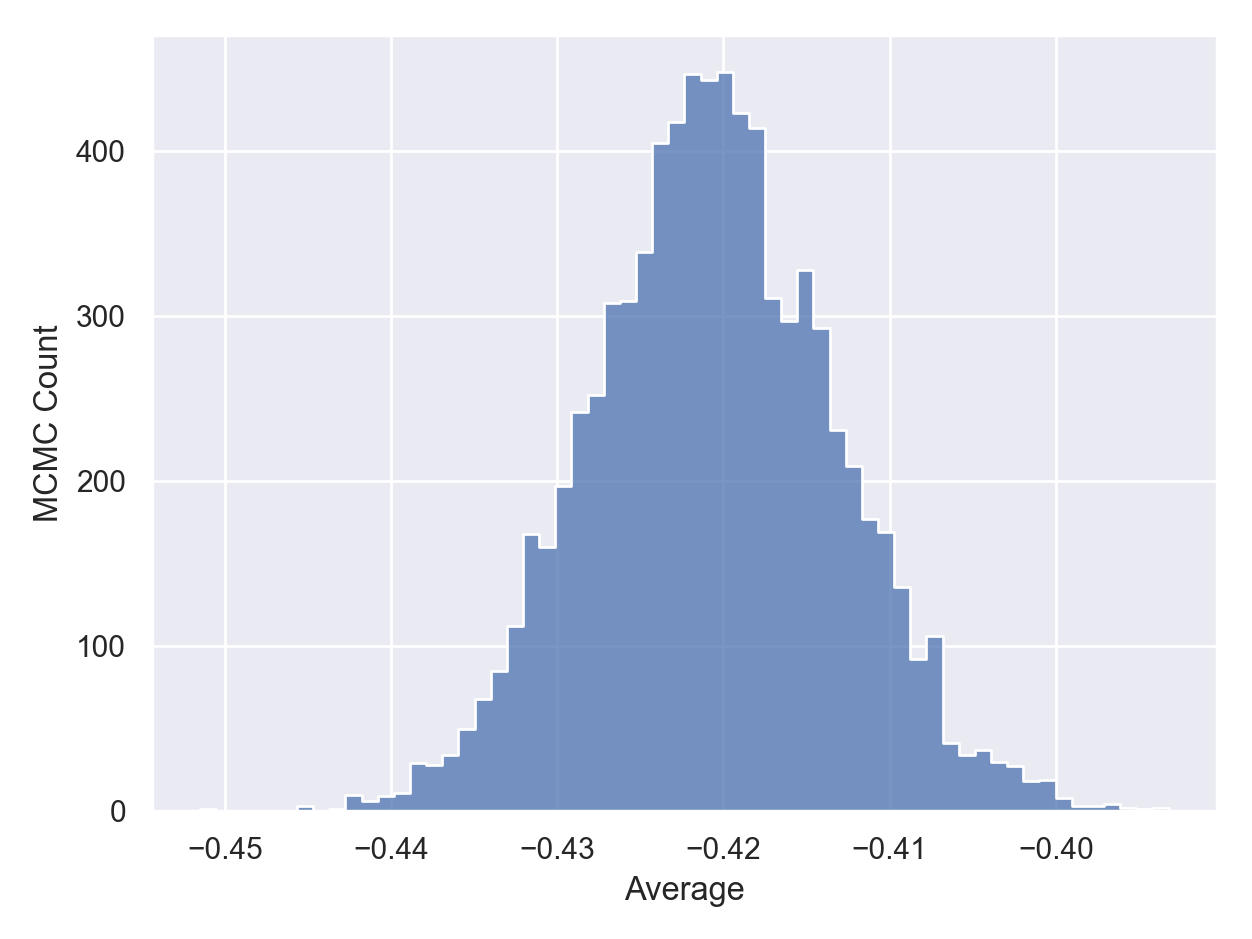

done in 0.099999 seconds.
LogStandardDeviation
ParaDRAM - NOTE: making the histplot plot... 

C:\Users\shahmoradia\Anaconda3\lib\site-packages\paramonte\vis\_BasePlot.py:638: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  self.currentFig.axes = self.currentFig.figure.gca( **vars(self.axes.kws) )


<IPython.core.display.Javascript object>


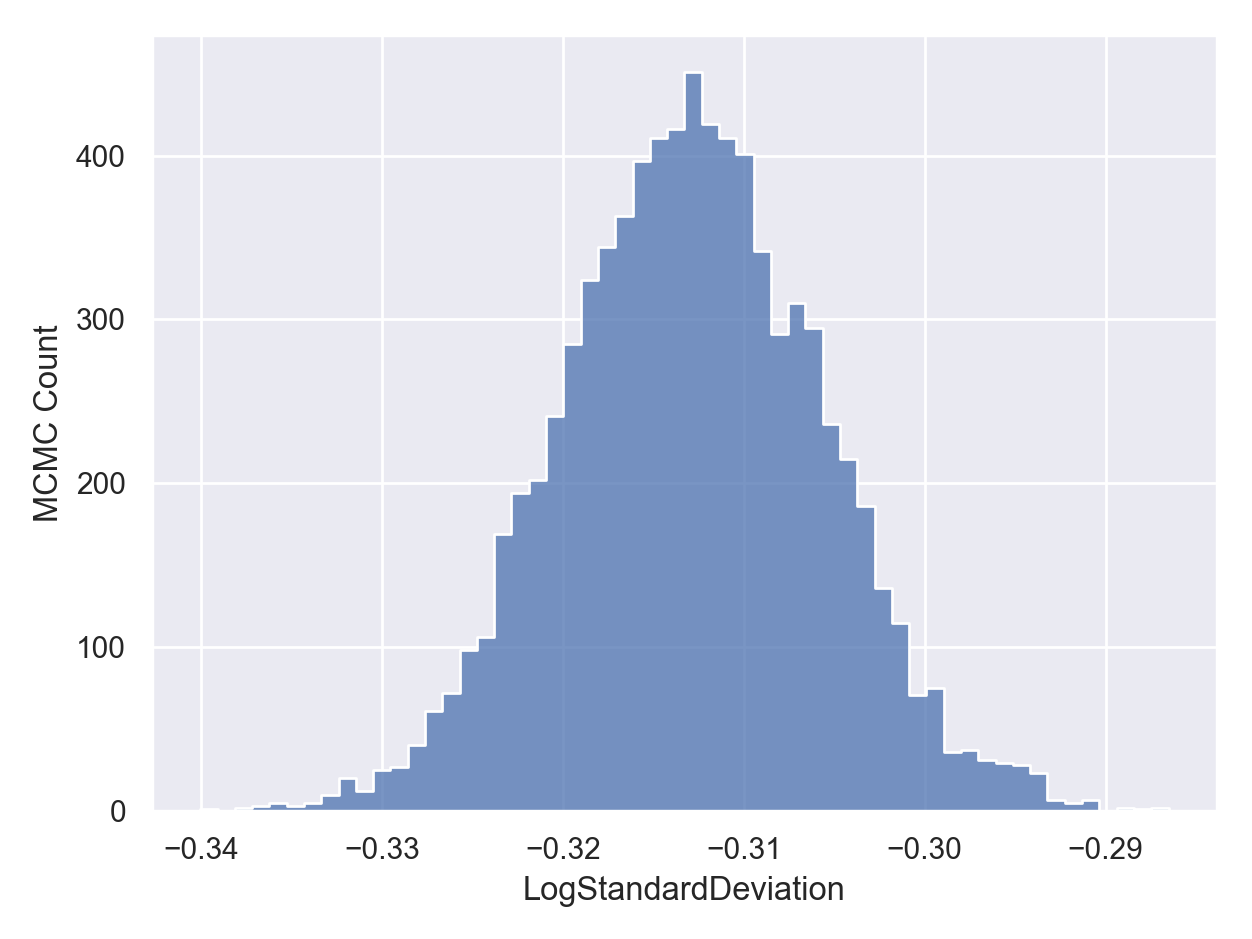

C:\Users\shahmoradia\Anaconda3\lib\site-packages\paramonte\vis\_BasePlot.py:638: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  self.currentFig.axes = self.currentFig.figure.gca( **vars(self.axes.kws) )


done in 0.104999 seconds.


In [40]:
# read the resulting sample

sample = pmpd.readSample(renabled = True)[0]

# plot traceplots of the sampled parameters

for colname in pmpd.sampleList[0].df.columns:
    sample.plot.line.ycolumns = colname
    sample.plot.line.outputFile = "traceplot_" + colname
    sample.plot.line()
    sample.plot.line.currentFig.axes.set_xlabel("MCMC Count")
    sample.plot.line.currentFig.axes.set_ylabel(colname)

# plot the histograms of the sampled parameters

for colname in pmpd.sampleList[0].df.columns:
    print(colname)
    sample.plot.histplot.xcolumns = colname
    sample.plot.histplot.outputFile = "histogram_" + colname
    sample.plot.histplot()
    sample.plot.histplot.currentFig.axes.set_xlabel(colname)
    sample.plot.histplot.currentFig.axes.set_ylabel("MCMC Count")


In [33]:
np.exp(sample.df.LogStandardDeviation.mean())

0.7313067769704376

<IPython.core.display.Javascript object>


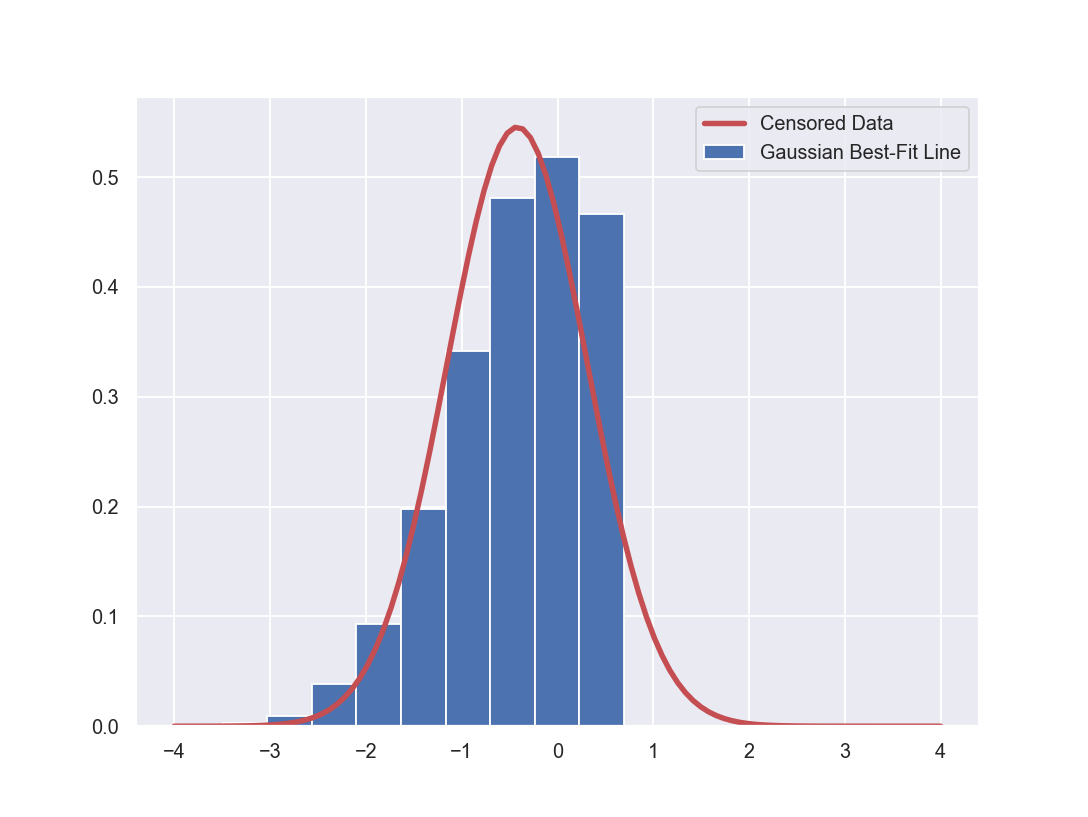

In [38]:
logStd = sample.df.LogStandardDeviation.mean()
mean = sample.df.Average.mean()

import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot()
ax.hist( logx
       , density = True
       )
xval = np.linspace(-4, 4, 100)
yval = np.exp(getLogPDF(xval, mean, logStd))
ax.plot( xval
       , yval
       , color = "r"
       , linewidth = 3
       )
plt.legend(["Censored Data", "Gaussian Best-Fit Line"])
plt.savefig("CensoredDataGaussianFit.png")

ParaDRAM - NOTE: making the contour3 plot... 

<IPython.core.display.Javascript object>


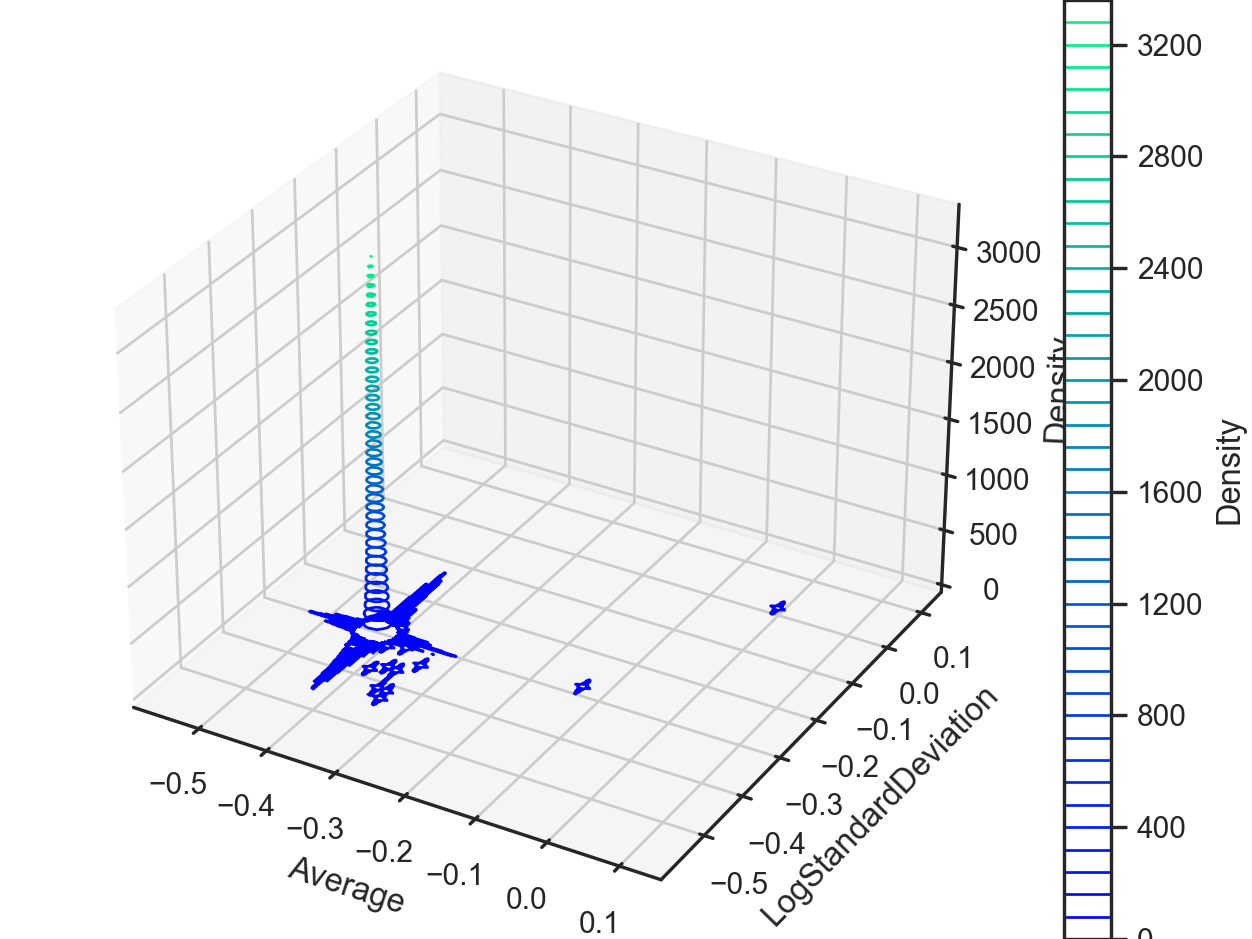

C:\Users\shahmoradia\Anaconda3\lib\site-packages\paramonte\vis\_BasePlot.py:636: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.currentFig.axes = Axes3D(self.currentFig.figure, **vars(self.axes3d.kws) )


done in 0.547998 seconds.


In [36]:
#chain = pmpd.readChain(renabled = True)[0]
chain.plot.contour3()

ParaDRAM - NOTE: making the lineScatter3 plot... 

<IPython.core.display.Javascript object>


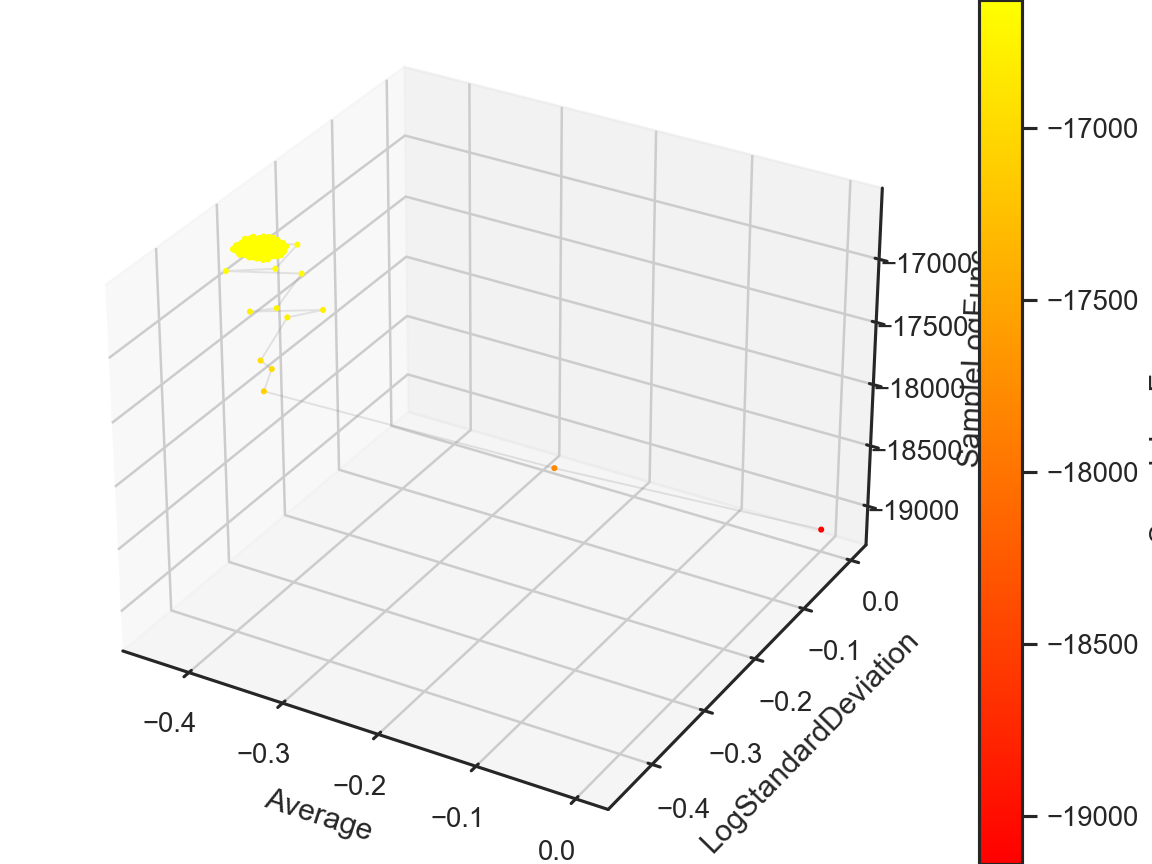

done in 0.112996 seconds.


In [31]:
chain.plot.lineScatter3()


ParaDRAM - WARNING: The ``delimiter`` is neither given as input to ``readSample()``
ParaDRAM - WARNING: nor set as a simulation specification of the ParaDRAM object. 
ParaDRAM - WARNING: This information is essential, otherwise how could the output files be parsed?
ParaDRAM - WARNING: For now, the ParaDRAM sampler will assume a comma-separated 
ParaDRAM - WARNING: file format for the contents of the sample file(s) to be parsed.


ParaDRAM - NOTE: 1 files detected matching the pattern: "D:\Dropbox\Projects\20190704_recipes\recipes.raw\programming\regression-censored-gaussian-data\ParaDRAM_run_20211112_150822_807*_sample.txt"


ParaDRAM - NOTE: processing sample file: D:\Dropbox\Projects\20190704_recipes\recipes.raw\programming\regression-censored-gaussian-data\ParaDRAM_run_20211112_150822_807_process_1_sample.txt
ParaDRAM - NOTE: reading the file contents... done in 0.09078 seconds.
ParaDRAM - NOTE: ndim = 2, count = 5225
ParaDRAM - NOTE: parsing file contents... 
ParaDRAM - NOTE: comp

<IPython.core.display.Javascript object>


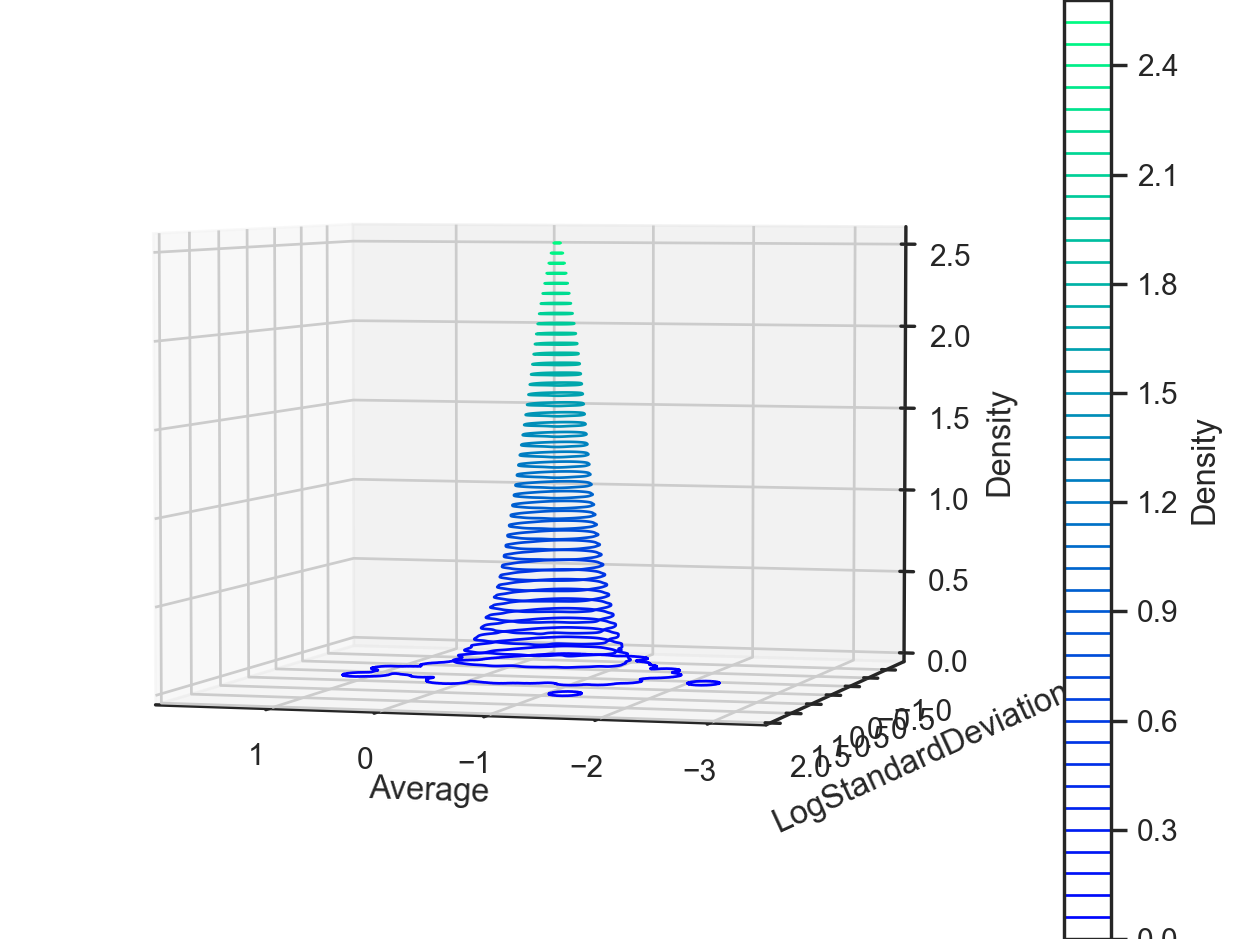

C:\Users\shahmoradia\Anaconda3\lib\site-packages\paramonte\vis\_BasePlot.py:636: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.currentFig.axes = Axes3D(self.currentFig.figure, **vars(self.axes3d.kws) )


done in 0.490998 seconds.
ParaDRAM - NOTE: making the lineScatter3 plot... 

<IPython.core.display.Javascript object>


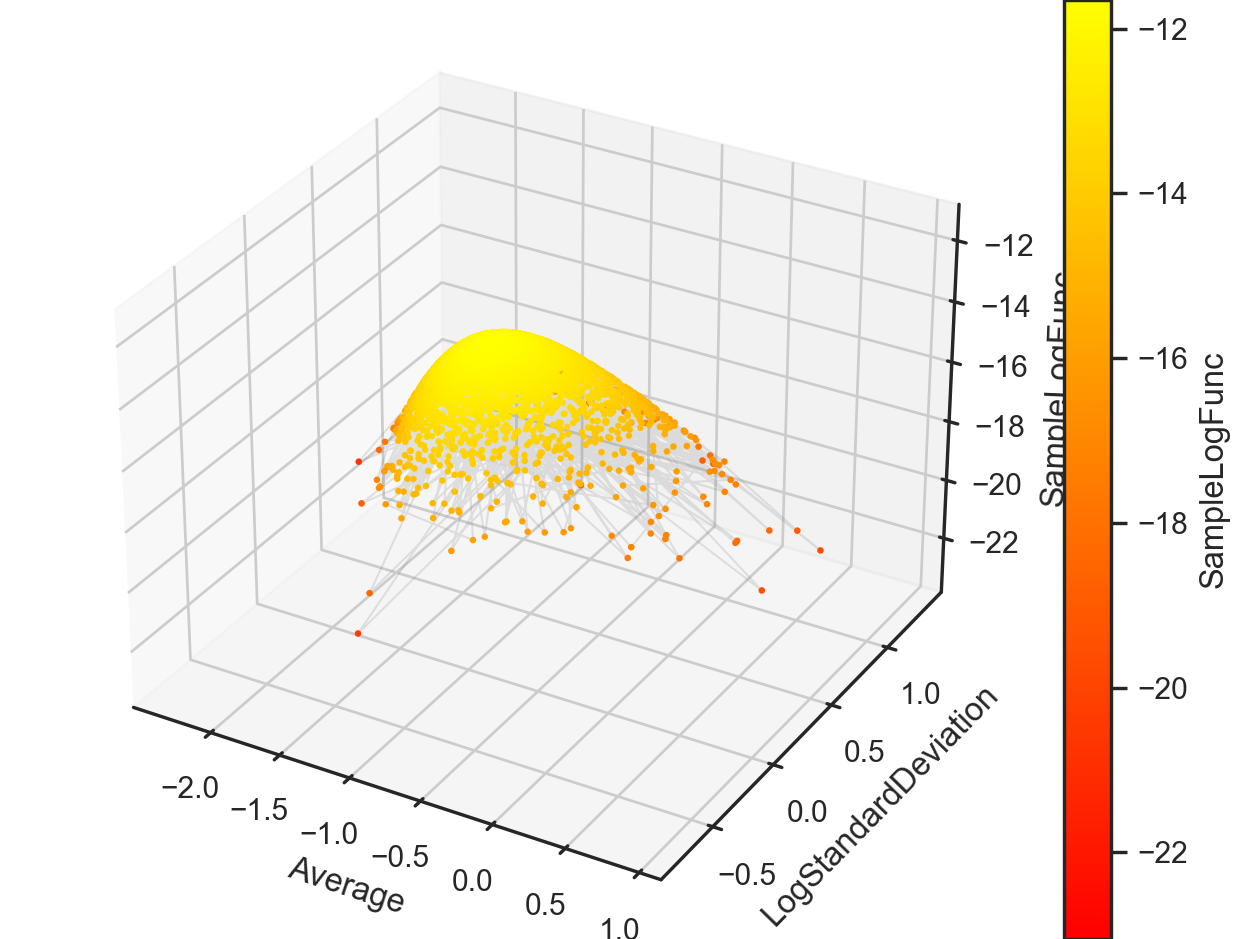

done in 0.070993 seconds.


In [38]:
sample = pmpd.readSample(renabled = True)[0]
sample.plot.contour3()
sample.plot.lineScatter3()

In [1]:
"A".replace("","X")

'XAX'

In [25]:
class Normal():

    def __init__(self, normData):
        self.data = normData
        self.ndata = len(self.data)
        self.maxdata = np.max(self.data)

    def getLogProb(self, data, avg, logStd, cutoff):
        """
        Return the logarithm of the probability density of an input set of x values, 
        given the input parameters (avg,logStd,cutoff) for the Gaussian PDF.
        """
        std = np.exp(logStd)
        return - 2.506628274631000 - logStd - 0.5 * ( (data-avg) / std )**2 - np.log(norm.cdf(cutoff, avg, std))

    def getLogLike(self,param):
        if param[2] < self.maxdata:
            # data cannot be larger than the threshold, 
            # so such parameter set for the Gaussian is impossible
            # therefore return negative infinity as the value of the logLikelihood
            return -1.e300
        else:
            return np.sum( self.getLogProb(self.data, param[0], param[1], param[2]) )

normal = Normal(normData = logx)

In [28]:
pmpd = pm.ParaDRAM() # create a ParaDRAM sampler object
pmpd.spec.chainSize = 20000 # change the number of sampled points from default 100,000 to 30,000
pmpd.spec.variableNameList = ["Average","LogStandardDeviation","Cutoff"]
pmpd.spec.startPointVec = [0,0,normal.maxdata] # ensure the initial starting point of the search for cutoff is good.
pmpd.spec.targetAcceptanceRate = [0.1,0.2]

# call MCMC sampler

pmpd.runSampler( ndim = 3
               , getLogFunc = normal.getLogLike
               )


ParaDRAM - NOTE: Running the ParaDRAM sampler in serial mode...
ParaDRAM - NOTE: To run the ParaDRAM sampler in parallel mode visit: cdslab.org/pm
ParaDRAM - NOTE: If you are using Jupyter notebook, check the Jupyter's terminal window
ParaDRAM - NOTE: for realtime simulation progress and report.


ParaDRAM - NOTE: To read the generated output files sample or chain files, try the following:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     pmpd.readSample()      # to read the final i.i.d. sample from the output sample file. 
ParaDRAM - NOTE:     pmpd.readChain()       # to read the uniquely-accepted points from the output chain file. 
ParaDRAM - NOTE:     pmpd.readMarkovChain() # to read the Markov Chain. NOT recommended for extremely-large chains.
ParaDRAM - NOTE: 
ParaDRAM - NOTE: Replace 'pmpd' with the name you are using for your ParaDRAM object.
ParaDRAM - NOTE: For more information and examples on the usage, visit:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     https://www.cdslab.org/paramonte/




ParaDRAM - WARNING: delimiter is neither given as input nor set as a ParaDRAM object property.
ParaDRAM - WARNING: This information is essential for successful reading of the requested sample file(s).
ParaDRAM - WARNING: Proceeding with the default assumption of comma-delimited sample file contents...

ParaDRAM - NOTE: 1 files detected matching the pattern: "D:\Dropbox\Projects\20190704_recipes\recipes.raw\programming\regression-censored-gaussian-data\ParaDRAM_run_20200815_221354_321*_sample.txt"
ParaDRAM - NOTE: processing file: D:\Dropbox\Projects\20190704_recipes\recipes.raw\programming\regression-censored-gaussian-data\ParaDRAM_run_20200815_221354_321_process_1_sample.txt
ParaDRAM - NOTE: reading file contents... done in 0.02194 seconds.
ParaDRAM - NOTE: parsing file contents... done in 0.000997 seconds.
ParaDRAM - NOTE: computing sample correlation matrix... done in 0.00698 seconds.
ParaDRAM - NOTE: computing sample covariance matrix... done in 0.006981 seconds.
ParaDRAM - NOTE: 

<IPython.core.display.Javascript object>


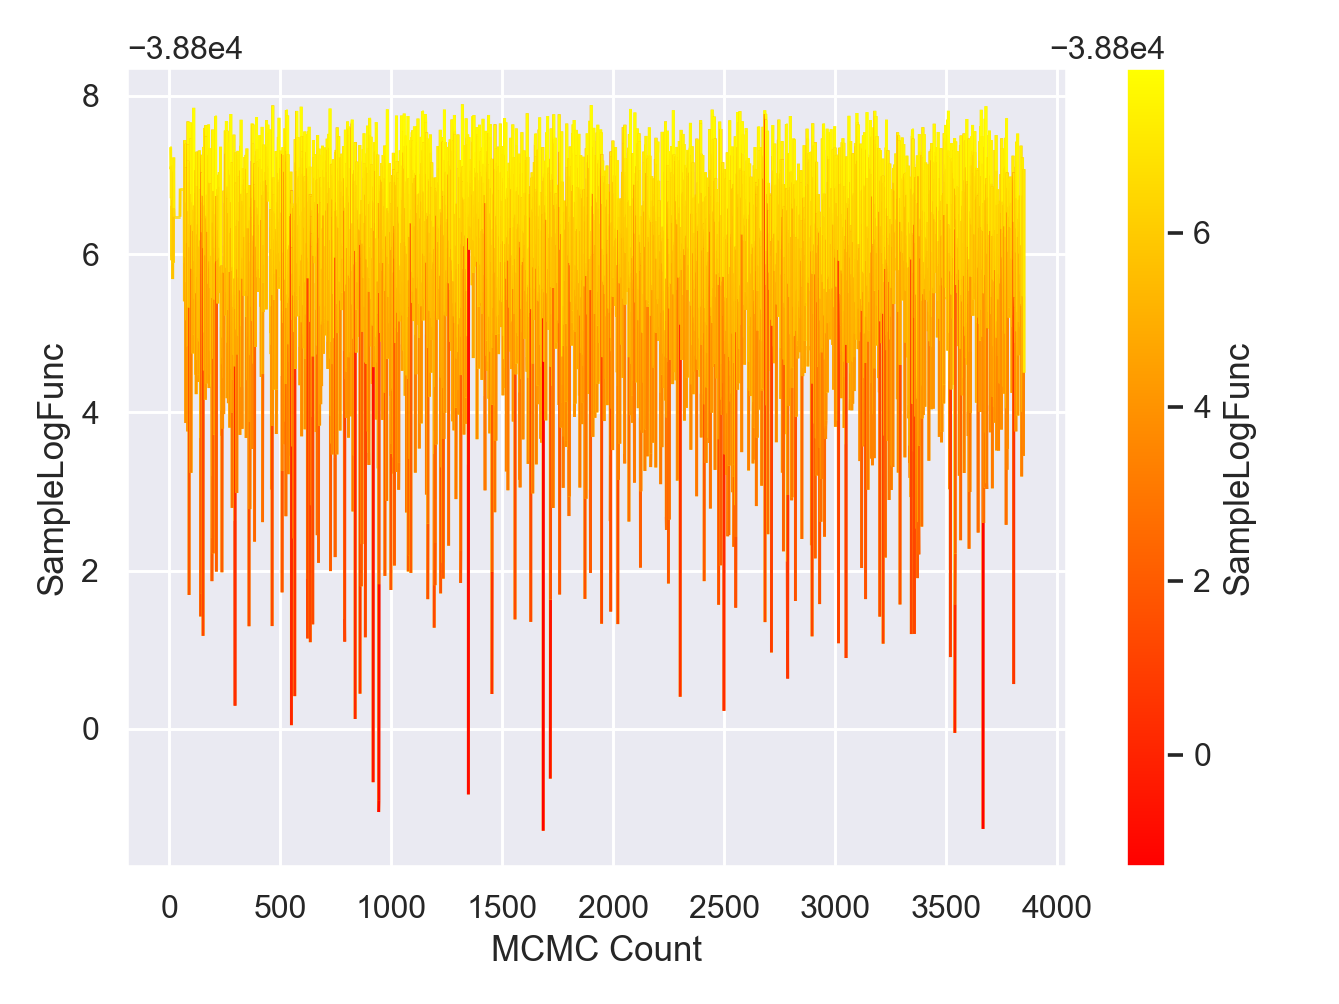

<IPython.core.display.Javascript object>


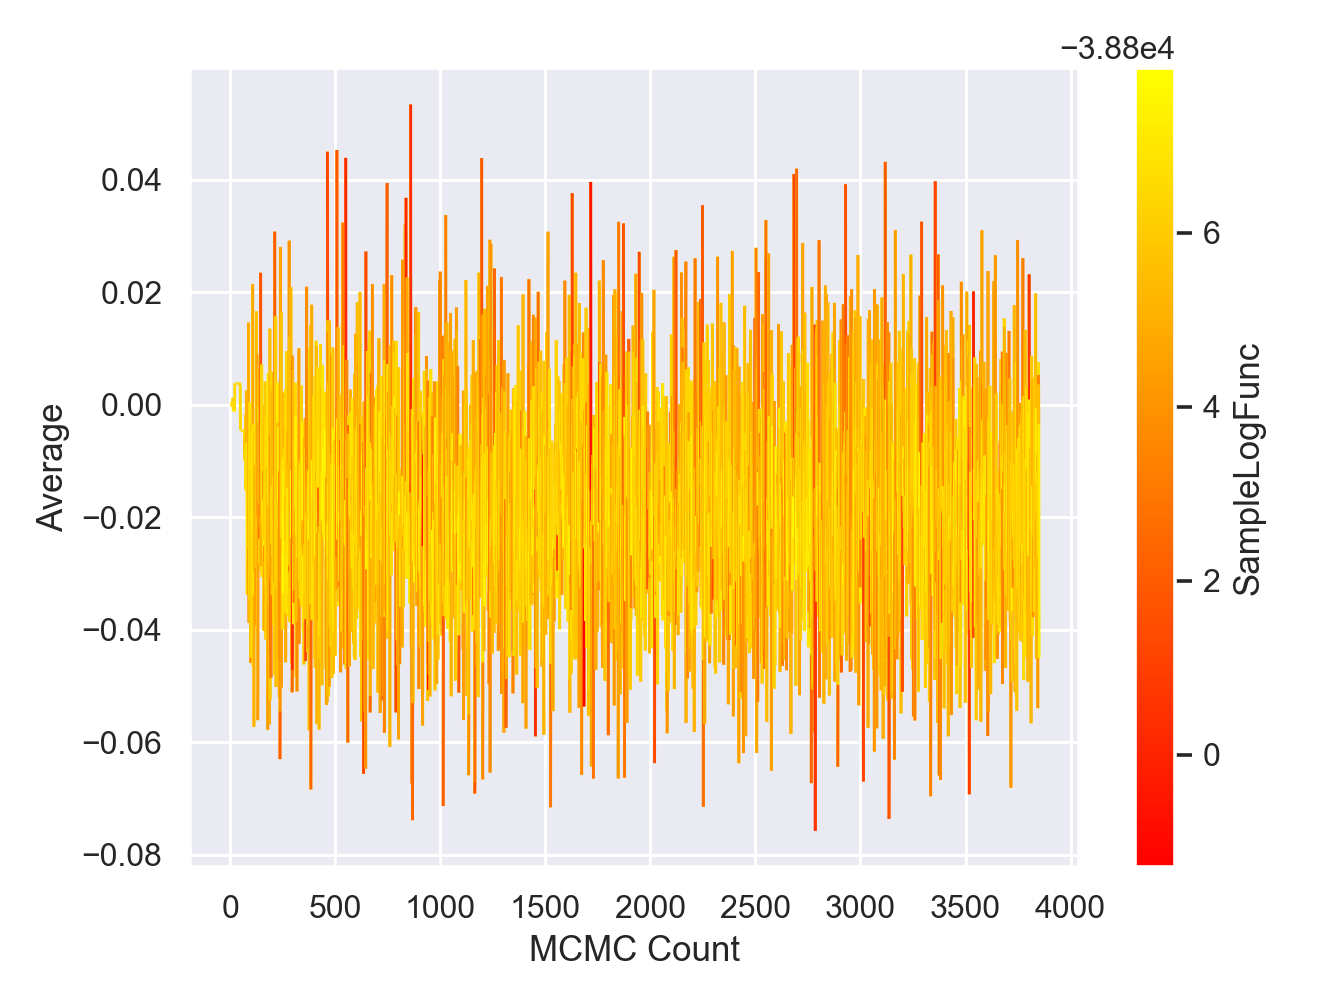

<IPython.core.display.Javascript object>


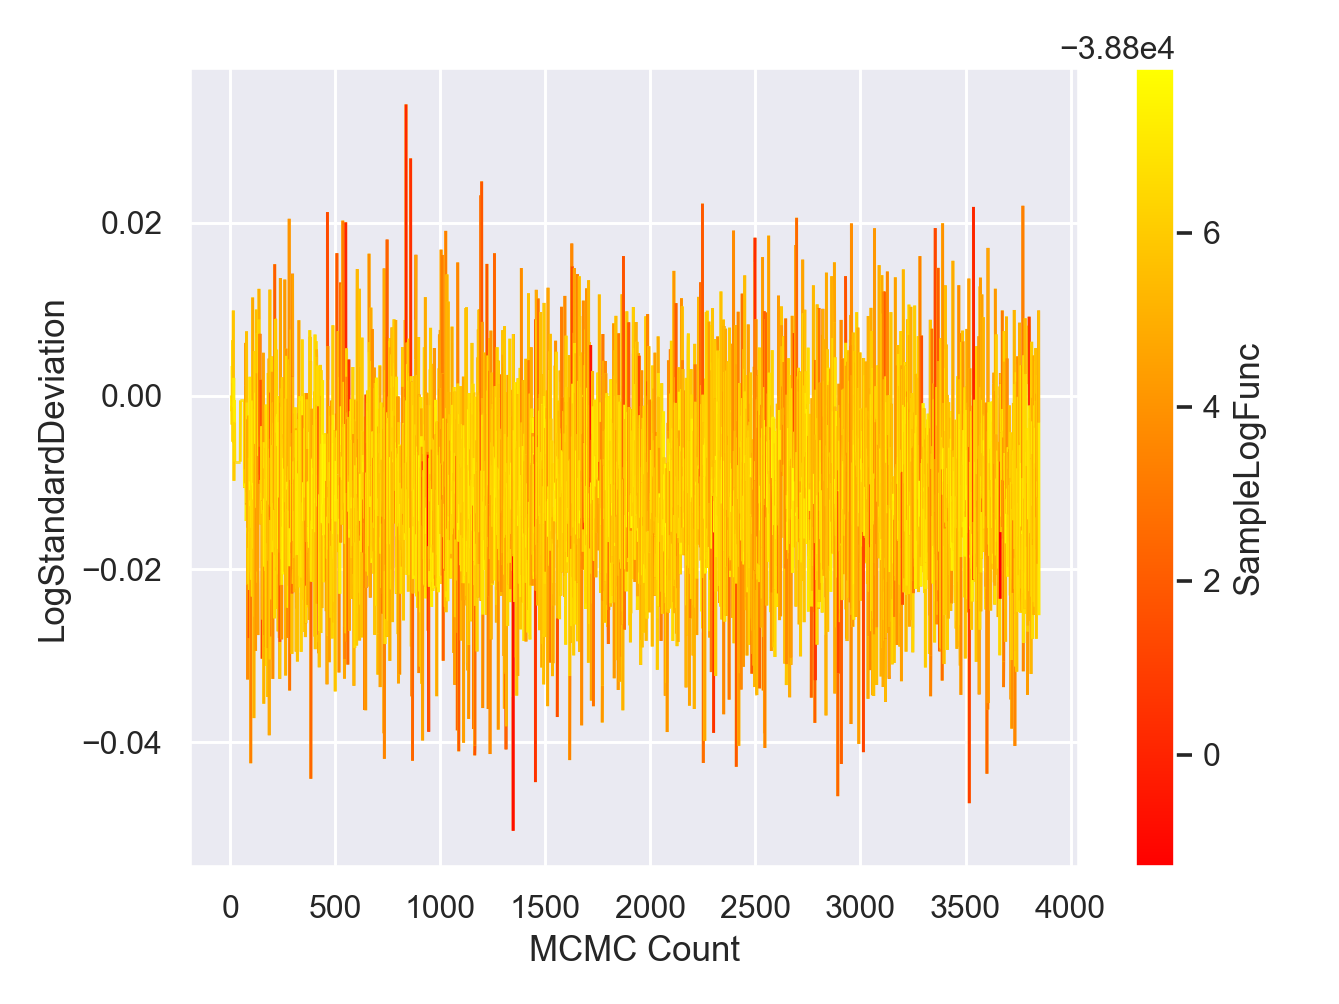

<IPython.core.display.Javascript object>


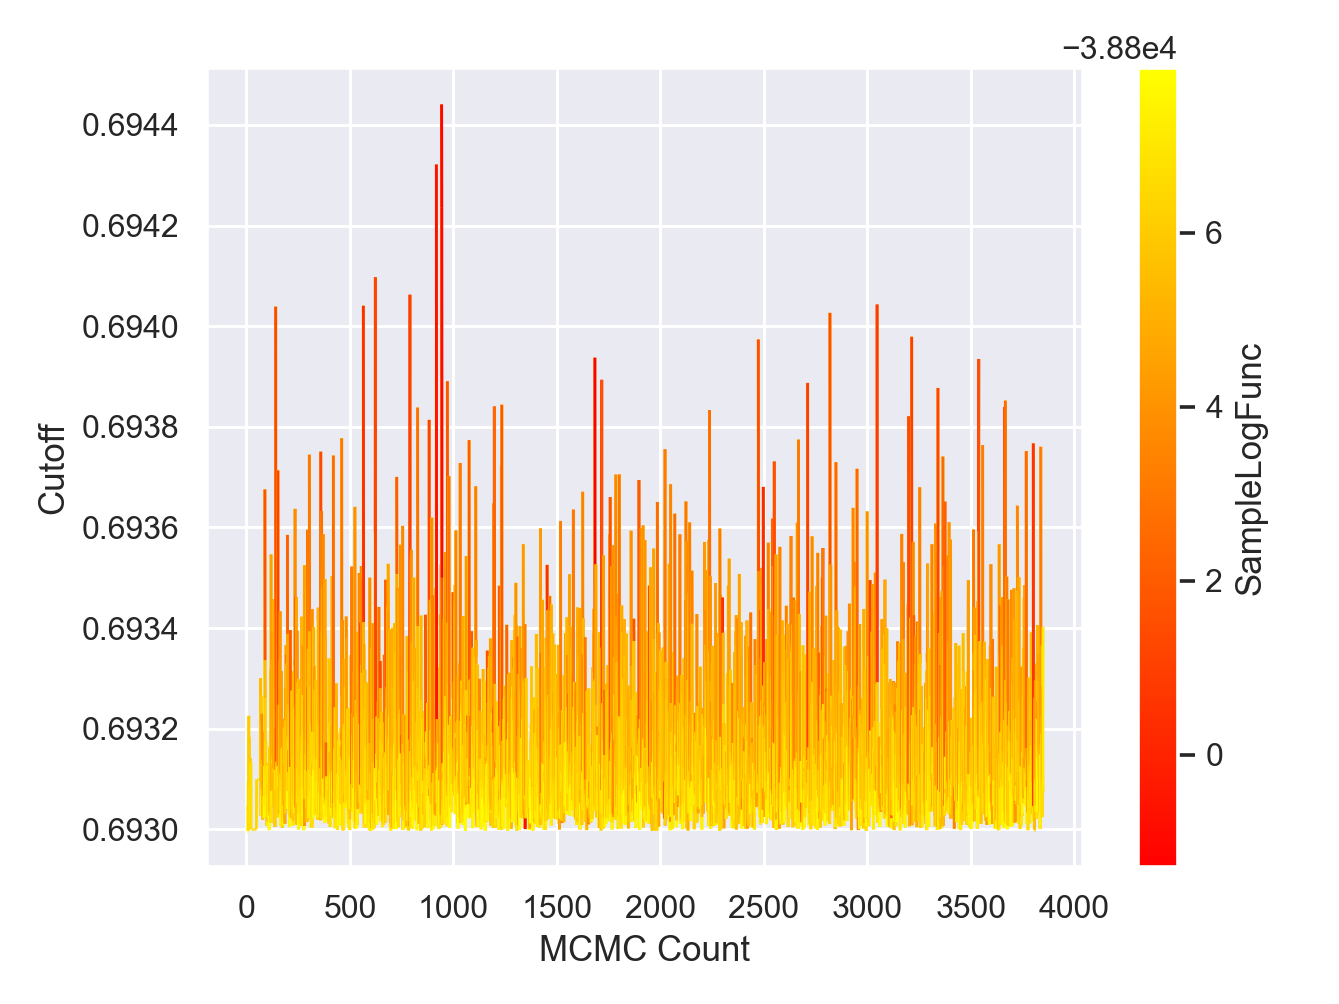

In [30]:
# read the resulting sample
pmpd.readSample()

# plot the sampled variables
for colname in pmpd.sampleList[0].df.columns:
    pmpd.sampleList[0].plot.line.ycolumns = colname
    pmpd.sampleList[0].plot.line.outputFile = "traceplot_" + colname
    pmpd.sampleList[0].plot.line()
    pmpd.sampleList[0].plot.line.currentFig.axes.set_xlabel("MCMC Count")
    pmpd.sampleList[0].plot.line.currentFig.axes.set_ylabel(colname)



<IPython.core.display.Javascript object>


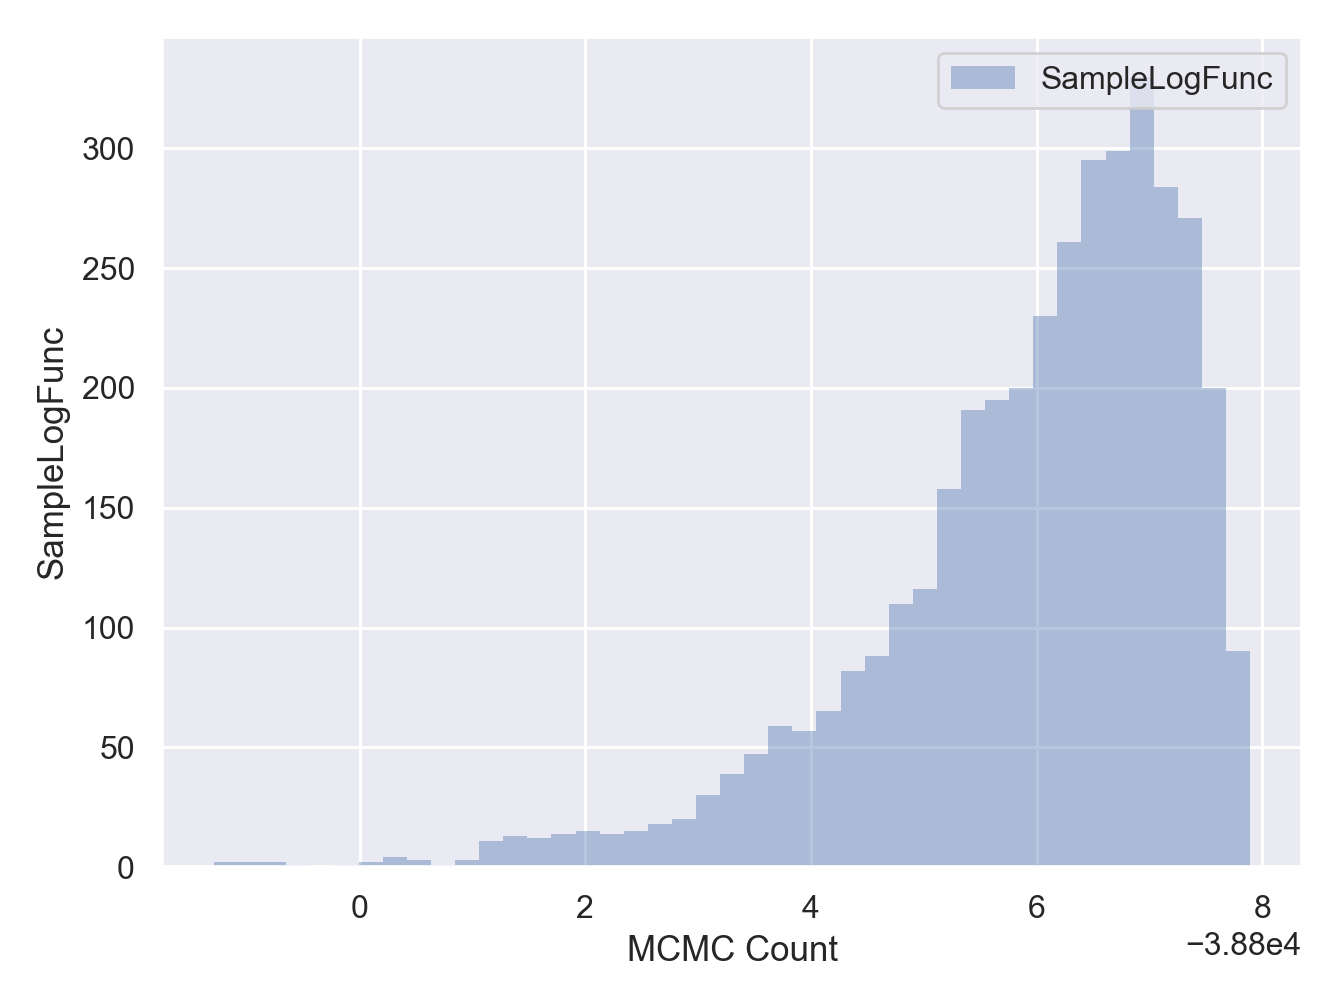

<IPython.core.display.Javascript object>


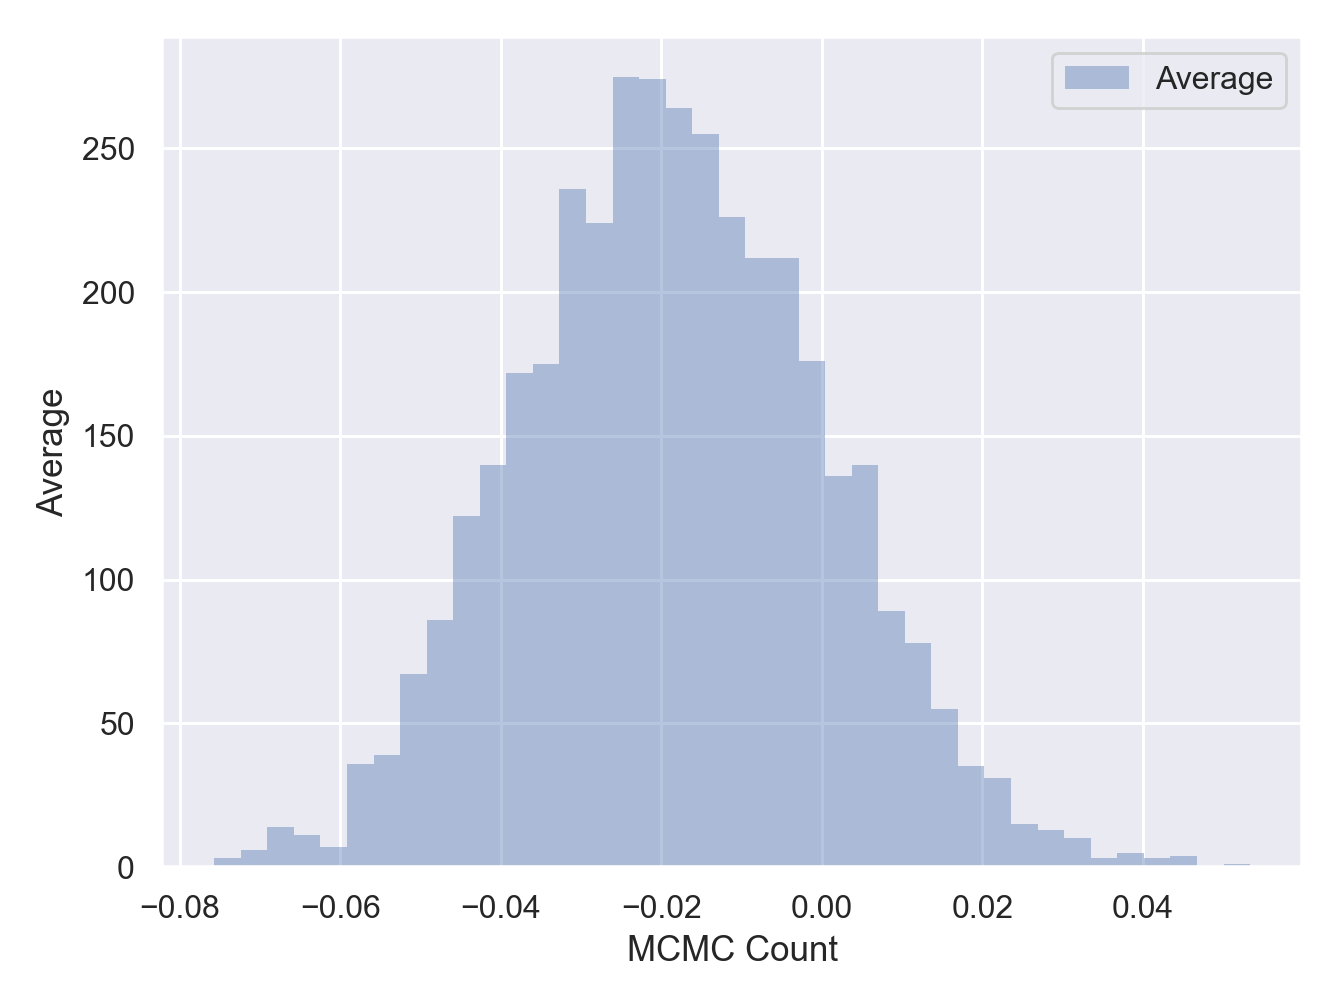

<IPython.core.display.Javascript object>


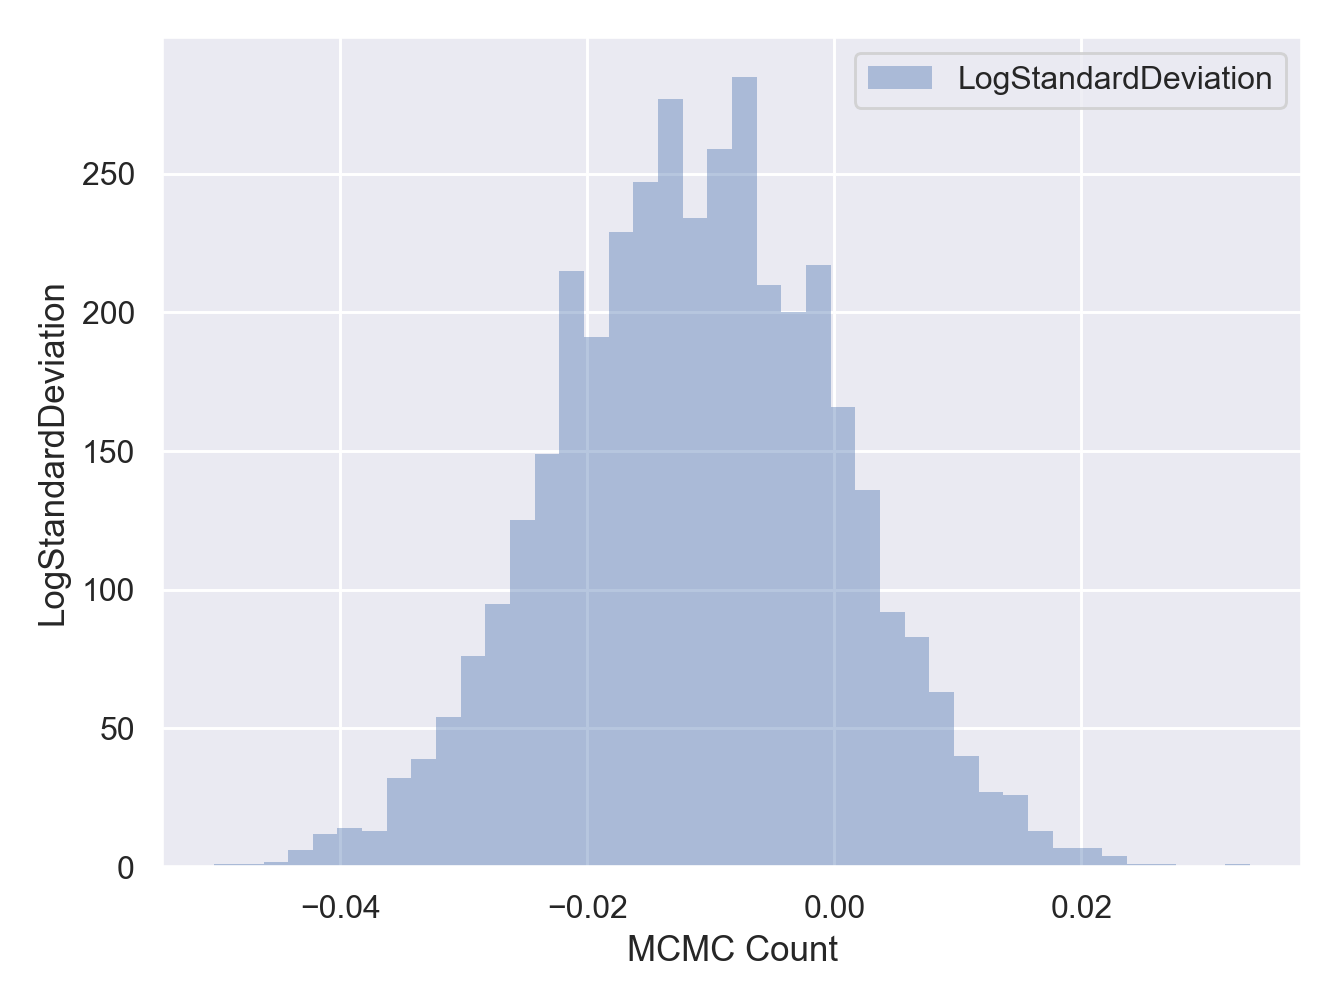

<IPython.core.display.Javascript object>


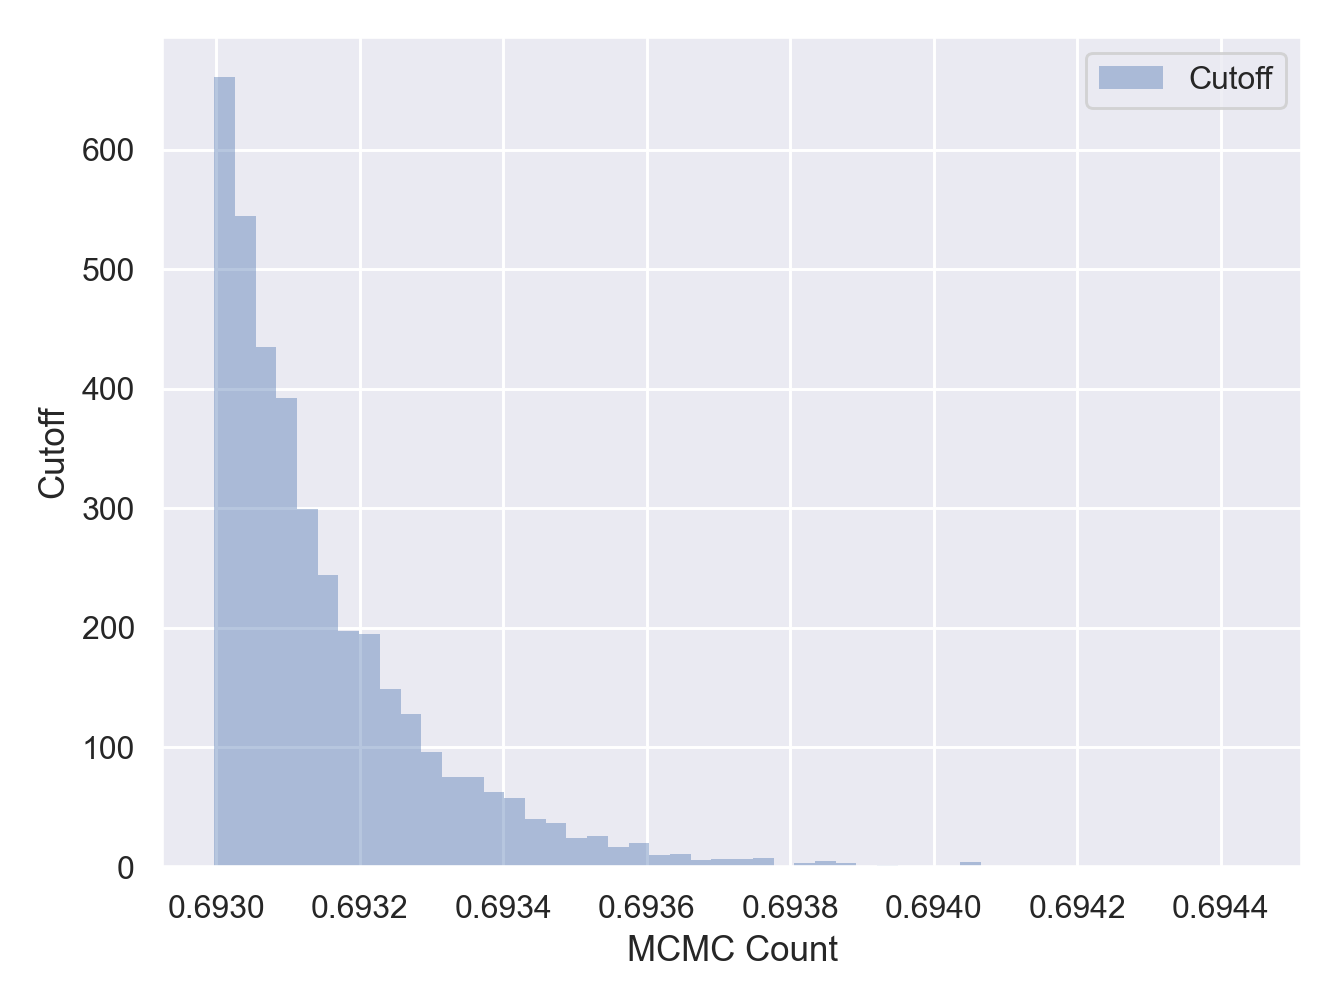

In [32]:
# plot the histograms of the sampled parameters
for colname in pmpd.sampleList[0].df.columns:
    pmpd.sampleList[0].plot.hist.columns = colname
    pmpd.sampleList[0].plot.hist.outputFile = "histogram_" + colname
    pmpd.sampleList[0].plot.hist()
    pmpd.sampleList[0].plot.hist.currentFig.axes.set_xlabel("MCMC Count")
    pmpd.sampleList[0].plot.hist.currentFig.axes.set_ylabel(colname)


In [42]:
# make interactive plotting possible in Jupyter Notebook

try:
    %matplotlib notebook
except:
    pass

# import visualization and data libraries

import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()

df = pd.read_csv("http://www.cdslab.org/recipes/programming/regression-censored-gaussian-data/data.csv", header=None)
df.head()

# log-transform data so that it can be fit by a Normal distribution

logx = np.double(np.log(df.iloc[:,0]))

# plot histogram of log(data)

fig = plt.figure()
ax = fig.gca()
ax.hist(logx)
ax.set_xlim([-4,4])
ax.set_xlabel("Log( X )")
ax.set_ylabel("Count")
plt.show()

# generate the Normal class containing the log-likelihood function

class Normal():

    def __init__(self, normData):
        self.data = normData
        self.ndata = len(self.data)
        self.maxdata = np.max(self.data)

    def getLogProb(self, data, avg, logStd, cutoff):
        """
        Return the logarithm of the probability density of an input set of x values, 
        given the input parameters (avg,logStd,cutoff) for the Gaussian PDF.
        """
        std = np.exp(logStd)
        return -0.9189385332 - logStd - 0.5 * ( (data-avg) / std )**2 - np.log(norm.cdf(cutoff, avg, std))

    def getLogLike(self,param):
        if param[2] < self.maxdata:
            # data cannot be larger than the threshold, 
            # so such parameter set for the Gaussian is impossible
            # therefore return negative infinity as the value of the logLikelihood
            return -1.e300
        else:
            return np.sum( self.getLogProb(self.data, param[0], param[1], param[2]) )

normal = Normal(normData = logx)

# sample the log-likelihood function via the ParaDRAM MCMC sampler

import paramonte as pm
pmpd = pm.ParaDRAM() # create a ParaDRAM sampler object
pmpd.spec.chainSize = 20000 # change the number of sampled points from default 100,000 to 30,000
pmpd.spec.variableNameList = ["Average","LogStandardDeviation","Cutoff"]
pmpd.spec.startPointVec = [0,0,normal.maxdata] # ensure the initial starting point of the search for cutoff is good.
pmpd.spec.targetAcceptanceRate = [0.1,0.3] # ensure the MCMC sampling efficiency does not become too large or too small.

# call the MCMC sampler

pmpd.runSampler( ndim = 3
               , getLogFunc = normal.getLogLike
               )

# read the resulting sample

sample = pmpd.readSample(renabled = True)[0]

# plot traceplots of the sampled parameters

for colname in pmpd.sampleList[0].df.columns:
    sample.plot.line.ycolumns = colname
    sample.plot.line.outputFile = "traceplot_" + colname
    sample.plot.line()
    sample.plot.line.currentFig.axes.set_xlabel("MCMC Count")
    sample.plot.line.currentFig.axes.set_ylabel(colname)

# plot the histograms of the sampled parameters

for colname in pmpd.sampleList[0].df.columns:
    sample.plot.histplot.columns = colname
    sample.plot.histplot.outputFile = "histogram_" + colname
    sample.plot.histplot()
    sample.plot.histplot.currentFig.axes.set_xlabel(colname)
    sample.plot.histplot.currentFig.axes.set_ylabel("MCMC Count")

pmpd.sample.df.mean()

<IPython.core.display.Javascript object>


ParaDRAM - NOTE: Running the ParaDRAM sampler in serial mode...
ParaDRAM - NOTE: To run the ParaDRAM sampler in parallel mode visit:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     https://www.cdslab.org/paramonte
ParaDRAM - NOTE: 
ParaDRAM - NOTE: If you are using Jupyter notebook, check the Jupyter's 
ParaDRAM - NOTE: terminal window for realtime simulation progress and report.


ParaDRAM - NOTE: To read the generated output files, try:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     pmpd.readReport()      # to read the summary report from the output report file.
ParaDRAM - NOTE:     pmpd.readSample()      # to read the final i.i.d. sample from the output sample file.
ParaDRAM - NOTE:     pmpd.readChain()       # to read the uniquely-accepted points from the output chain file.
ParaDRAM - NOTE:     pmpd.readMarkovChain() # to read the Markov Chain. NOT recommended for very large chains.
ParaDRAM - NOTE:     pmpd.readRestart()     # to read the contents of an ASCII-format output restart file.
ParaDRAM 

AttributeError: 'ParaDRAM' object has no attribute 'sampleList'

<IPython.core.display.Javascript object>


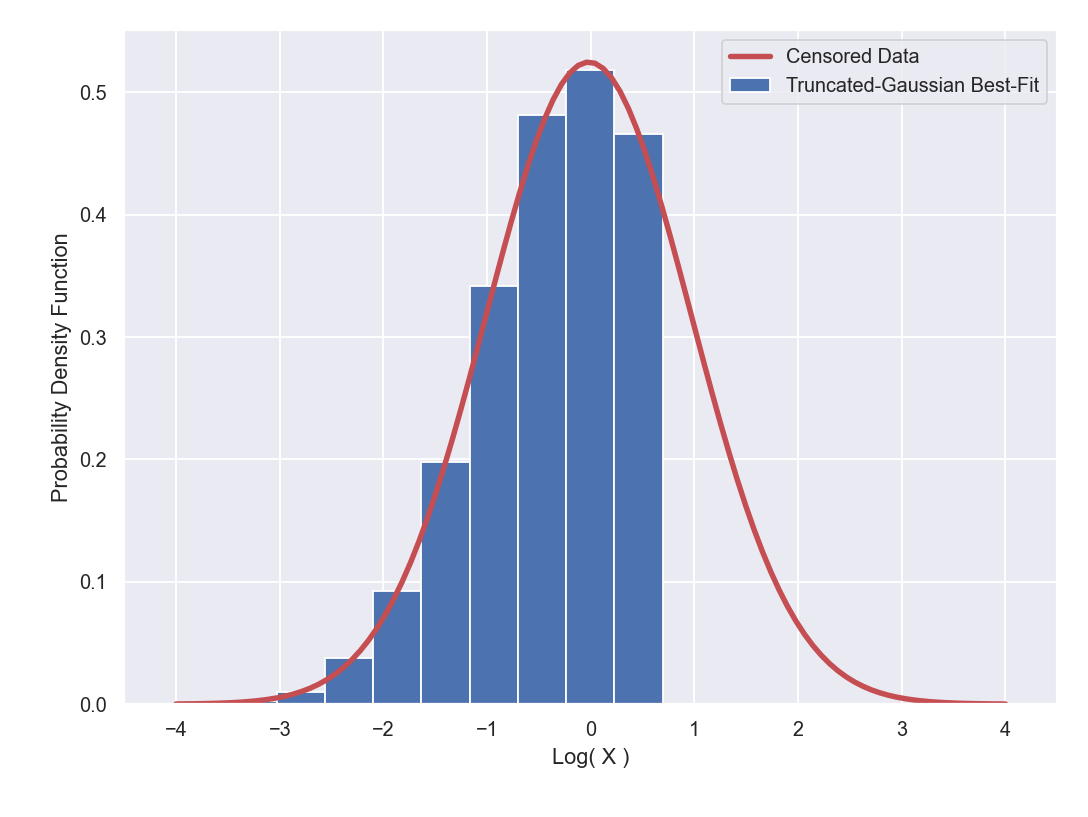

In [53]:
logStd = sample.df.LogStandardDeviation.mean()
mean = sample.df.Average.mean()

import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot()
ax.hist( logx
       , density = True
       )
xval = np.linspace(-4, 4, 100)
yval = np.exp(getLogPDF(xval, mean, logStd))
ax.plot( xval
       , yval * 5.2/4
       , color = "r"
       , linewidth = 3
       )
ax.set_xlim([-4.5, 4.5])
ax.set_xlabel("Log( X )")
ax.set_ylabel("Probability Density Function")
plt.legend(["Censored Data", "Truncated-Gaussian Best-Fit"])
plt.tight_layout()
plt.savefig("CensoredDataCensoredNormalFit.png")

In [33]:
pmpd.sampleList[0].df.mean()

SampleLogFunc          -38794.057165
Average                    -0.018469
LogStandardDeviation       -0.011038
Cutoff                      0.693154
dtype: float64

In [ ]:
np.max(logx)

In [ ]:
norm.cdf(cutoff, avg, std)

In [ ]:
pmpd.sampleList[0].plot.hist.columns